In [1]:
## Binary Classification Using VGG16

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
### Loding Data

In [4]:
data_set_path = '/content/drive/MyDrive/Data sets/Elephant Binary Classification' # root folder 

In [5]:
# finding training data path and test data path 

In [6]:
train_data_path = '/content/drive/MyDrive/Data sets/Elephant Binary Classification/train'
test_data_path = '/content/drive/MyDrive/Data sets/Elephant Binary Classification/test'

In [7]:
# Making Images into linear format using tensorflow ImageDataGenerator

In [8]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
preprocess_train = ImageDataGenerator(rescale = 1. / 255 , 
                                      shear_range = 0.2 , 
                                      zoom_range = 0.4,
                                      vertical_flip = True,
                                      horizontal_flip = True)


preprocess_test = ImageDataGenerator(rescale = 1./255)

In [10]:
# Collecting each image from train and test folder

In [11]:
labels = ['African','Asian']

In [12]:
train_data = preprocess_train.flow_from_directory(train_data_path , target_size=[256,256] , class_mode = 'binary' ,classes = labels , batch_size = 32)

Found 840 images belonging to 2 classes.


In [13]:
test_data = preprocess_test.flow_from_directory(test_data_path , target_size=[256,256] , class_mode = 'binary' ,classes = labels , batch_size = 32)

Found 188 images belonging to 2 classes.


In [14]:
## Now I am not developing my own custom model so I am taking a copy of vgg16 Architecture

In [15]:
from tensorflow.keras.applications.vgg19 import VGG19

In [16]:
## Making Image Size

In [17]:
image_size = [256,256]

In [18]:
sol = VGG19(input_shape = image_size + [3] , weights='imagenet' , include_top=False)

80134624/80134624 [==============================] - 4s 0us/step


In [19]:
# We Should not  update weights of vgg16:

In [20]:
for i in sol.layers:
  i.trainable = False

In [21]:
from tensorflow.keras.layers import Flatten

In [22]:
# Developing my own output layer:

In [23]:
y = Flatten()(sol.output)

In [24]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import sigmoid

In [25]:
from keras.api._v2.keras import activations
final = Dense(1 ,activation = 'sigmoid')(y)

In [26]:
from tensorflow.keras.models import Model

In [27]:
vgg19_model = Model(sol.inputs , final)

In [28]:
vgg19_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [29]:
vgg19_model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['Accuracy'])

In [30]:
vgg19_model.fit(train_data , epochs = 25)

Epoch 1/25
27/27 [==============================] - 258s 9s/step - loss: 1.0022 - Accuracy: 0.5071
Epoch 2/25
27/27 [==============================] - 15s 546ms/step - loss: 0.6611 - Accuracy: 0.6024
Epoch 3/25
27/27 [==============================] - 15s 568ms/step - loss: 0.6109 - Accuracy: 0.6714
Epoch 4/25
27/27 [==============================] - 16s 562ms/step - loss: 0.5979 - Accuracy: 0.6750
Epoch 5/25
27/27 [==============================] - 15s 548ms/step - loss: 0.6275 - Accuracy: 0.6452
Epoch 6/25
27/27 [==============================] - 15s 552ms/step - loss: 0.5892 - Accuracy: 0.6964
Epoch 7/25
27/27 [==============================] - 15s 555ms/step - loss: 0.5761 - Accuracy: 0.7060
Epoch 8/25
27/27 [==============================] - 15s 555ms/step - loss: 0.5856 - Accuracy: 0.6940
Epoch 9/25
27/27 [==============================] - 15s 554ms/step - loss: 0.6086 - Accuracy: 0.6917
Epoch 10/25
27/27 [==============================] - 15s 553ms/step - loss: 0.6027 - Accuracy

In [31]:
# checking with test_data

In [32]:
test_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [33]:
y_test_pred = vgg19_model.predict(test_data)

6/6 [==============================] - 99s 20s/step


In [35]:
y_test_pred

array([[0.515645  ],
       [0.591978  ],
       [0.2945746 ],
       [0.93097264],
       [0.54094577],
       [0.8088336 ],
       [0.4337532 ],
       [0.7383127 ],
       [0.98057795],
       [0.05085835],
       [0.8939611 ],
       [0.3607451 ],
       [0.9457818 ],
       [0.6833092 ],
       [0.9208445 ],
       [0.8429505 ],
       [0.6197612 ],
       [0.9600355 ],
       [0.94796383],
       [0.5174351 ],
       [0.5759948 ],
       [0.987832  ],
       [0.9898807 ],
       [0.45876542],
       [0.9960919 ],
       [0.33657598],
       [0.9806136 ],
       [0.46494204],
       [0.21348506],
       [0.9964509 ],
       [0.9415161 ],
       [0.8835605 ],
       [0.6744744 ],
       [0.82679635],
       [0.23982987],
       [0.11328343],
       [0.6177074 ],
       [0.9930074 ],
       [0.5875989 ],
       [0.94684356],
       [0.96576434],
       [0.02218976],
       [0.77328   ],
       [0.9156411 ],
       [0.18549578],
       [0.9935935 ],
       [0.8669405 ],
       [0.574

In [36]:
c = []

for i in y_test_pred:
  if i > 0.5:
    c.append(1)
  else:
    c.append(0)

In [37]:
c

[1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1]

In [38]:
### Checking Accuracy and Confusion Matrix Classifiaction Report

In [39]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [40]:
accuracy_score(test_data.classes , c)

0.48404255319148937

In [41]:
confusion_matrix(test_data.classes , c)

array([[24, 73],
       [24, 67]])

In [42]:
print(classification_report(test_data.classes , c))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33        97
           1       0.48      0.74      0.58        91

    accuracy                           0.48       188
   macro avg       0.49      0.49      0.46       188
weighted avg       0.49      0.48      0.45       188



In [43]:
## Checking With Own Data

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def predictions(path):
  image = cv2.imread(path)
  image = cv2.resize(image , (256,256))
  image = np.array(image) / 255.0
  image = np.expand_dims(image , axis = 0)
  print(image.shape)
  result = vgg19_model.predict(image)
  print(result)
  if result > 0.5:
    print('African')
  else:
    print('Asian')
  img = plt.imread(path)
  plt.imshow(img)


In [50]:
## Checking with Asian Elephant Images

(1, 256, 256, 3)
1/1 [==============================] - 0s 31ms/step
[[0.95815337]]
African


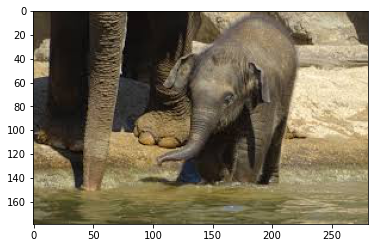

In [61]:
predictions('/content/drive/MyDrive/Data sets/Elephant Binary Classification/train/Asian/as_tr112.jpg')

(1, 256, 256, 3)
1/1 [==============================] - 0s 23ms/step
[[0.9865363]]
African


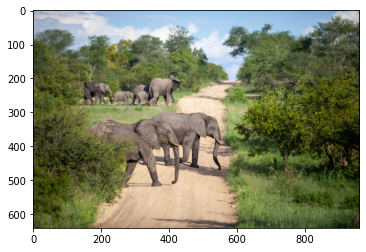

In [58]:
predictions('/content/drive/MyDrive/Data sets/Elephant Binary Classification/test/Asian/as_te15.jpg')

(1, 256, 256, 3)
1/1 [==============================] - 0s 147ms/step
[[0.95675665]]
African


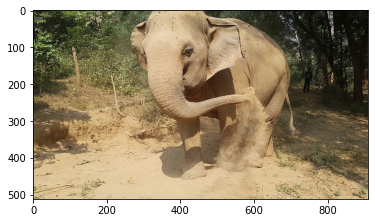

In [52]:
predictions('/content/drive/MyDrive/Data sets/Elephant Binary Classification/test/Asian/as_te1.jpg')

In [53]:
# Checking with African Elephant Images

(1, 256, 256, 3)
1/1 [==============================] - 0s 21ms/step
[[0.68957406]]
African


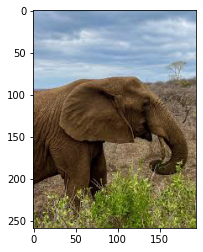

In [54]:
predictions('/content/drive/MyDrive/Data sets/Elephant Binary Classification/test/African/af_te12.jpg')

(1, 256, 256, 3)
1/1 [==============================] - 0s 21ms/step
[[0.5070262]]
African


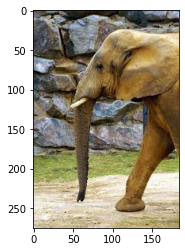

In [57]:
predictions('/content/drive/MyDrive/Data sets/Elephant Binary Classification/train/African/af_tr10.jpg')